# Linearized Multi-Sampling Tutorial

In this notebook, we demonstrate how to do image warping/transformation using bilinear and liearized sampler. 


---
## Basic warping

A common image warping function should have 3 main parameters, the input images, the transformation matrix, and the optional output shape, looks like: ```warp_image(image, homography, out_shape=None)```.
We also provide `grid_sample` method, which aligns with Pytorch official API.

---
let's import everything

In [1]:
import os

import numpy as np
import torch
import matplotlib.pyplot as plt
import imageio

from warp import sampling_helper
from utils import utils
from gradient_visualizer import gradient_visualizer

---
let's load an image

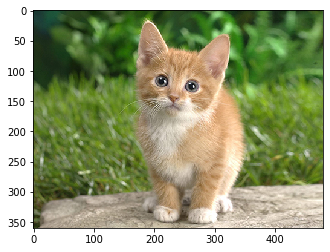

In [2]:
image_path = './notebook_data/cute.jpg'
cute_cat = imageio.imread(image_path)
cute_cat = cute_cat / 255.0
plt.imshow(cute_cat)
plt.show()
# convert np image to torch image
cute_cat = utils.np_img_to_torch_img(cute_cat).float()

---
let's define an transformation matrix and output shape

In [3]:
trans_mat = torch.tensor([[[ 0.6705,  0.4691, -0.1369],
         [-0.4691,  0.6705, -0.0432],
         [ 0.0000,  0.0000,  1.0000]]], device='cpu')
out_shape = [128, 128]

---
let's warp the image using bilinear sampler

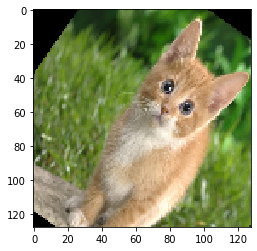

In [4]:
bilinear_sampler = sampling_helper.DifferentiableImageSampler('bilinear', 'zeros')
bilinear_transformed_image = bilinear_sampler.warp_image(cute_cat, trans_mat, out_shape=out_shape)
# convert torch image to np
bilinear_transformed_image = utils.torch_img_to_np_img(bilinear_transformed_image)
plt.imshow(bilinear_transformed_image[0])
plt.show()

---
let's warp the image with linearized sampler.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


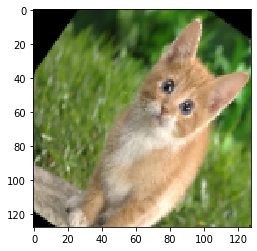

In [5]:
linearized_sampler = sampling_helper.DifferentiableImageSampler('linearized', 'zeros')
linearized_transformed_image = linearized_sampler.warp_image(cute_cat, trans_mat, out_shape=out_shape)
# convert torch image to np
linearized_transformed_image = utils.torch_img_to_np_img(linearized_transformed_image)
plt.imshow(linearized_transformed_image[0])
plt.show()

---
## Gradient Visualization

In order to visualize the gradient, we need a transformation with pure translation. We'll do a 10x10 grid search, at each point, we'll compare the translated image with the original image, and get the direction of gradient.

In [6]:
class FakeOptions():
    pass

In [7]:
opt = FakeOptions()
opt.padding_mode = 'zeros'
opt.grid_size = 10
opt.optim_criterion = 'mse'
opt.optim_lr = 1e-2
opt.out_shape = [16, 16]

gradient_visualizer_instance = gradient_visualizer.GradientVisualizer(opt)

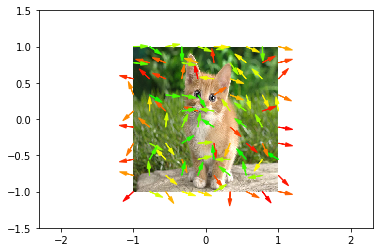

In [8]:
gradient_visualizer_instance.draw_gradient_grid(cute_cat[None], bilinear_sampler)

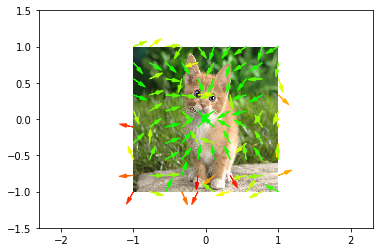

In [9]:
gradient_visualizer_instance.draw_gradient_grid(cute_cat[None], linearized_sampler)

Red arrows mean that the gradient at that point is wrong, while green means correct.